# Data Science 2: Multivariate Component Analysis Exam, 05 July 2022
 - Date: 05-July-2022
 - Student: Parvej Chowdhury
 - Student ID: 434653

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Dataset: Metabolom

The dataset **metabolom_data.csv** contains the measurements of monoterpenes in certain plant leaves in AUC/mg. 
These data come from the 2021 paper 'Unifying community detection across scales from genomes to landscapes' from Hudon and coworkers.


The dataset can be used to predict the **species** with multiple variables as input such as Unk3.2, Unk3.6, Unk11.9, Unk12.4, aPinene, Camphene etc. 

**Research Question:** Does monoterpenes has influence to determine the certain Species?

Therefore, **Multivariate Linear Regression (MLR)** will be performed on this dataset to observe that which  monoterpenes influence to determine the certain Species.

## Loading, inspecting and processing the data

In [2]:
# Read in data
df_metabolom = pd.read_csv('metabolom_data.csv', sep=',')
df_metabolom.head()

,SampleID,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,MF032,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,MF034,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,MF036,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,MF038,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,MF049,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


Columns **'SampleID'** is nothing but the sample information of the dataset. Hence this column is not required for our investigation, I am going to delete this column. 

In [3]:
df_metabolom.drop(columns=['SampleID'], inplace=True)

In [4]:
df_metabolom.head()

,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


In [5]:
# After deleting the column, lets check the shape of the dataset
print("Shape of the dataset:", df_metabolom.shape)

Shape of the dataset: (94, 18)


In [6]:
# Checking for null values
print("Total NULL values in the dataset:", df_metabolom.isnull().sum().sum())

Total NULL values in the dataset: 0


**Now seems that the dataset is clear and there is no NULL value.**

In [7]:
#Checking the dataset information:
df_metabolom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        94 non-null     object 
 1   Unk3.2         94 non-null     float64
 2   Unk3.6         94 non-null     float64
 3   Unk11.9        94 non-null     float64
 4   Unk12.4        94 non-null     float64
 5   aPinene        94 non-null     float64
 6   Camphene       94 non-null     float64
 7   bPinene        94 non-null     float64
 8   aPhellendrine  94 non-null     float64
 9   pcymene        94 non-null     float64
 10  Cineole        94 non-null     float64
 11  Unk18.2        94 non-null     float64
 12  Unk18.6        94 non-null     float64
 13  Unk20.5        94 non-null     float64
 14  Camphor        94 non-null     float64
 15  Unk21          94 non-null     float64
 16  Unk21.5        94 non-null     float64
 17  Unk23.5        94 non-null     float64
dtypes: float64(1

In [8]:
df_metabolom.describe()

,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,23.637208,49.746440,6.028160,4.369462,22.911734,73.423817,39.719561,19.620489,13.460596,31.659868,3.866462,10.295510,10.949594,51.884227,184.170440,70.105139,4.835827
std,11.762238,45.934756,9.760219,4.632796,30.168345,78.552456,38.794557,19.379608,14.916398,40.397170,3.589812,10.425231,15.539999,51.173726,270.186770,84.544764,9.389413
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.986044,0.466470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.798040,0.000000,0.000000,0.834461,2.362724,14.679631,11.553669,0.284020,2.732513,6.784367,0.000000,1.143200,0.000000,0.000000,13.898473,12.770461,0.375234
50%,24.549037,47.725224,3.838140,2.142871,5.044977,36.711745,29.782808,17.554953,5.429638,18.361643,3.436247,7.103815,4.854931,43.214138,21.627030,26.224342,4.071432
75%,30.255157,82.348979,6.979114,8.220087,44.599787,132.203274,50.284228,28.230423,21.953681,39.211700,6.106592,14.967212,14.658471,87.353869,485.348779,99.281195,6.601073
max,74.597506,199.915950,79.309390,14.912475,90.414947,295.400252,177.494829,97.095495,57.183207,246.192845,13.061673,45.105145,74.836348,212.499174,776.341069,392.559512,89.137992


In [9]:
uniqueValues = df_metabolom['Species'].unique()
print('Unique elements in column "Species" ')
print(uniqueValues)

Unique elements in column "Species" 
['wyoming' '3-tip' 'hybrid']


In [10]:
df_metabolom.loc[(df_metabolom.Species == 'wyoming'),'Species'] = 1
df_metabolom.loc[(df_metabolom.Species == '3-tip'),'Species'] = 2
df_metabolom.loc[(df_metabolom.Species == 'hybrid'),'Species'] = 3
# df_metabolom.head()
df_metabolom.columns

Index(['Species', 'Unk3.2', 'Unk3.6', 'Unk11.9', 'Unk12.4', 'aPinene',
       'Camphene', 'bPinene', 'aPhellendrine', 'pcymene', 'Cineole', 'Unk18.2',
       'Unk18.6', 'Unk20.5', 'Camphor', 'Unk21', 'Unk21.5', 'Unk23.5'],
      dtype='object')

### Draw a correlation plot to quickly explore correlations and get familiar with the data.

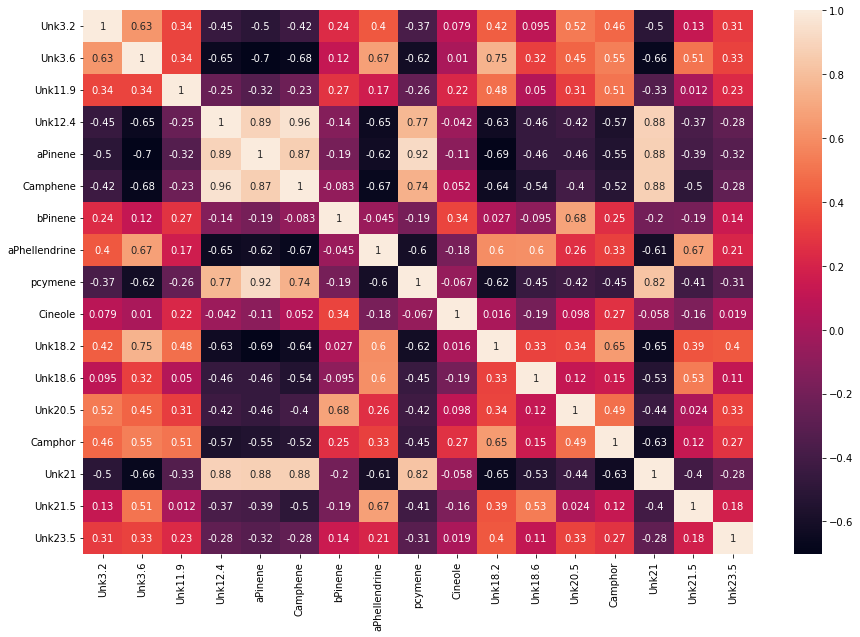

In [11]:
plt.figure(figsize=(15, 10))
corr = df_metabolom.corr()
sns.heatmap(data=corr, annot = True);

It can be seen that some factors like pcymene, CampheheaPinene, Unk3.6 has positive and negative effect on meserment of species.

### Now lets define the predictros (X) and target (y)

In [12]:
# Predictors
X = df_metabolom.drop(["Species"], axis=1)
print(X.columns)

# Target
y = df_metabolom.Species

# y

Index(['Unk3.2', 'Unk3.6', 'Unk11.9', 'Unk12.4', 'aPinene', 'Camphene',
       'bPinene', 'aPhellendrine', 'pcymene', 'Cineole', 'Unk18.2', 'Unk18.6',
       'Unk20.5', 'Camphor', 'Unk21', 'Unk21.5', 'Unk23.5'],
      dtype='object')


### Checking the max and min value of predictors (X)

In [13]:
print("MAX:", max(X.max()), ", MIN : ",  min(X.min()))

MAX: 776.3410685 , MIN :  0.0


It seems that the difference between MAX and MIN values are very big. Lets normalizing the data so that the coefficients will be less different.

In [14]:
## Normalizing the data
X=(X-X.min())/(X.max()-X.min())
X=(X-X.mean())/X.std()
X

,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,-0.526260,0.625538,-0.353798,-0.839423,-0.531623,-0.747984,-0.753047,2.305944,-0.546313,-0.612470,1.780601,1.863737,-0.362247,0.800893,-0.560488,2.073078,0.463822
1,-2.009584,-1.082980,-0.559544,1.058750,0.212788,1.483072,-0.491189,-0.993398,-0.352581,2.697744,-1.077065,-0.865211,-0.704607,-1.013884,1.818916,-0.671614,-0.446191
2,-0.883270,0.070362,-0.224316,-0.943159,-0.561965,-0.851145,-0.426581,2.169862,-0.767596,-0.669970,1.516307,1.686517,-0.048225,0.058828,-0.588454,1.918021,0.354691
3,-2.009584,0.482234,-0.045680,0.632670,-0.472334,-0.888083,-0.781426,-1.003866,-0.778095,-0.615580,1.438850,2.152985,-0.225578,0.295889,-0.589505,3.814008,0.570857
4,-0.691671,0.150471,0.100538,-0.857440,-0.759463,-0.813699,-0.733605,-0.075113,-0.686355,-0.358742,1.668908,-0.405207,-0.058080,0.704068,-0.559080,-0.825167,0.762376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.966003,1.329720,-0.237161,-0.707335,-0.638966,-0.611146,-0.732054,1.980206,-0.276412,-0.004249,1.280089,0.791129,-0.472131,0.771272,-0.608967,1.458917,0.260610
90,-0.840708,-1.082980,-0.617625,0.788920,0.814722,0.665837,-0.497058,-1.012430,1.115170,-0.661369,-1.077065,-0.914657,-0.704607,-1.013884,0.879019,-0.684907,-0.457028
91,-0.823895,-1.082980,-0.617625,0.845249,1.944720,0.885718,-1.006563,-1.012430,1.653869,-0.663855,-1.077065,-0.987557,-0.704607,-1.013884,1.160904,-0.670352,-0.515030
92,1.663117,0.384067,1.170703,-0.772932,-0.678734,-0.715516,0.902515,-0.034005,-0.678772,0.400116,0.762452,0.031479,1.936449,-0.052169,-0.566658,0.063674,-0.493397


In [15]:
print("MAX:", max(X.max()), ", MIN : ",  min(X.min()))

MAX: 8.97842797184804 , MIN :  -2.0095842080283295


#### We are seeing that after normalization, the difference between MAX and MIN values became less.

## Model Construction

The sklearn library allows us to construct a linear model out of the different variables that can that make predictions based on new data. It however only takes numerical data, thus categorial data/strings should not be included.

When constructing the model, sklearn looks for the best-fit line for each independent variable. It will select on the regression coefficients that lead to smallest model error, it will look at the model's t-statistic (whether the model is properly predicting the values) and finally the p-values (likelyhood to find the set of observations based on whether the null hypothesis is true). Finally, based on these values it constructs the best fitting line through the data.

## Make the model fit using data X and y

In [16]:
lr = LinearRegression()
lr.fit(X, y)
print("Intercept: ", lr.intercept_)
print("Coef: ", lr.coef_)

feature_list =  ['Unk3.2', 'Unk3.6', 'Unk11.9', 'Unk12.4', 'aPinene', 'Camphene', 
          'bPinene', 'aPhellendrine', 'pcymene', 'Cineole', 'Unk18.2','Unk18.6', 
          'Unk20.5', 'Camphor', 'Unk21', 'Unk21.5', 'Unk23.5']

# list(zip(feature_list, lr.coef_))

Intercept:  1.3191489361702124
Coef:  [ 0.00588794 -0.08775899  0.2243793  -0.19352178 -0.07613145  0.2434858
  0.02320025 -0.06841201  0.29098926 -0.19500944 -0.05703277  0.02413212
 -0.0600153  -0.00673614  0.08936789  0.1272041  -0.02607779]


In [17]:
predictions = lr.predict(X)

In [18]:
R2 = lr.score(X,y)
print('The explained variance by the model is: ', round(R2*100,1), '%')

print('\nThe resulting coefficients are: ')
for i in range(0,len(X.columns)):
    print(X.columns[i], ':', round(lr.coef_[i],2))

print('\nThe intercept is: ', round(lr.intercept_, 2))

The explained variance by the model is:  78.9 %

The resulting coefficients are: 
Unk3.2 : 0.01
Unk3.6 : -0.09
Unk11.9 : 0.22
Unk12.4 : -0.19
aPinene : -0.08
Camphene : 0.24
bPinene : 0.02
aPhellendrine : -0.07
pcymene : 0.29
Cineole : -0.2
Unk18.2 : -0.06
Unk18.6 : 0.02
Unk20.5 : -0.06
Camphor : -0.01
Unk21 : 0.09
Unk21.5 : 0.13
Unk23.5 : -0.03

The intercept is:  1.32


As we can see, **the variance of the Species is determind around 79% by the model.**

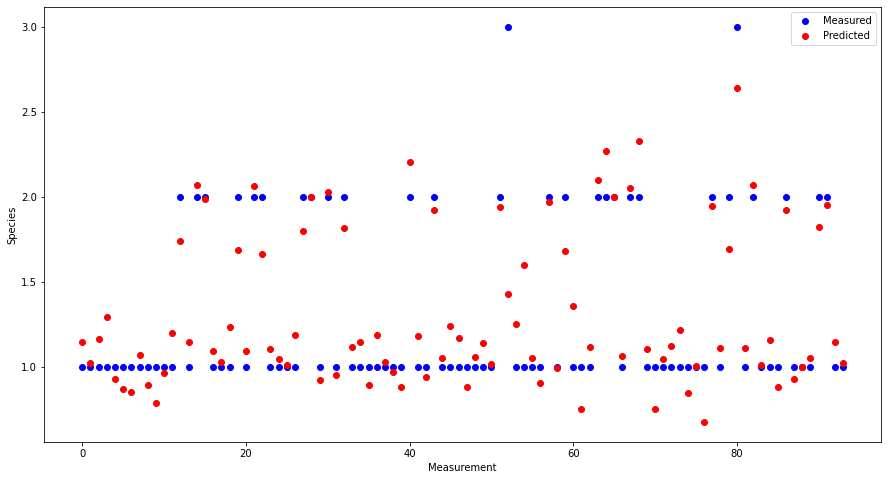

In [19]:
plt.figure(figsize=(15, 8))
plt.scatter(x=list(range(0, len(y))),y= y, color='blue', label='Measured')         
plt.scatter(x=list(range(0, len(y))), y=predictions, color='red', label = 'Predicted')
plt.ylabel('Species')
plt.xlabel('Measurement')
plt.legend()
plt.show()

# Discussion

Multivariate linear regression was used to **predict the species**. The relevant columns of the dataset were used to perform the regression. It was expected that monoterpenes in plant leaves have influence to determine the species. The result of the regression are:

The explained variance by the model is around 79.0 %

The resulting coefficients are: 
- Unk3.2  :  0.01
- Unk3.6  :  -0.09
- Unk11.9  :  0.22
- Unk12.4  :  -0.19
- aPinene  :  -0.08
- Camphene  :  0.24
- bPinene  :  0.02
- aPhellendrine  :  -0.07
- pcymene  :  0.29
- Cineole  :  -0.2
- Unk18.2  :  -0.06
- Unk18.6  :  0.02
- Unk20.5  :  -0.06
- Camphor  :  -0.01
- Unk21  :  0.09
- Unk21.5  :  0.13
- Unk23.5  :  -0.03

And the intercept is:  1.32

All of the variance is explained. Multivariate regression was useful to predict the species according multiple variables.
